In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold,cross_val_score
import statsmodels.api as sm 

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
bos['Price']=pd.DataFrame(boston.target)

In [4]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

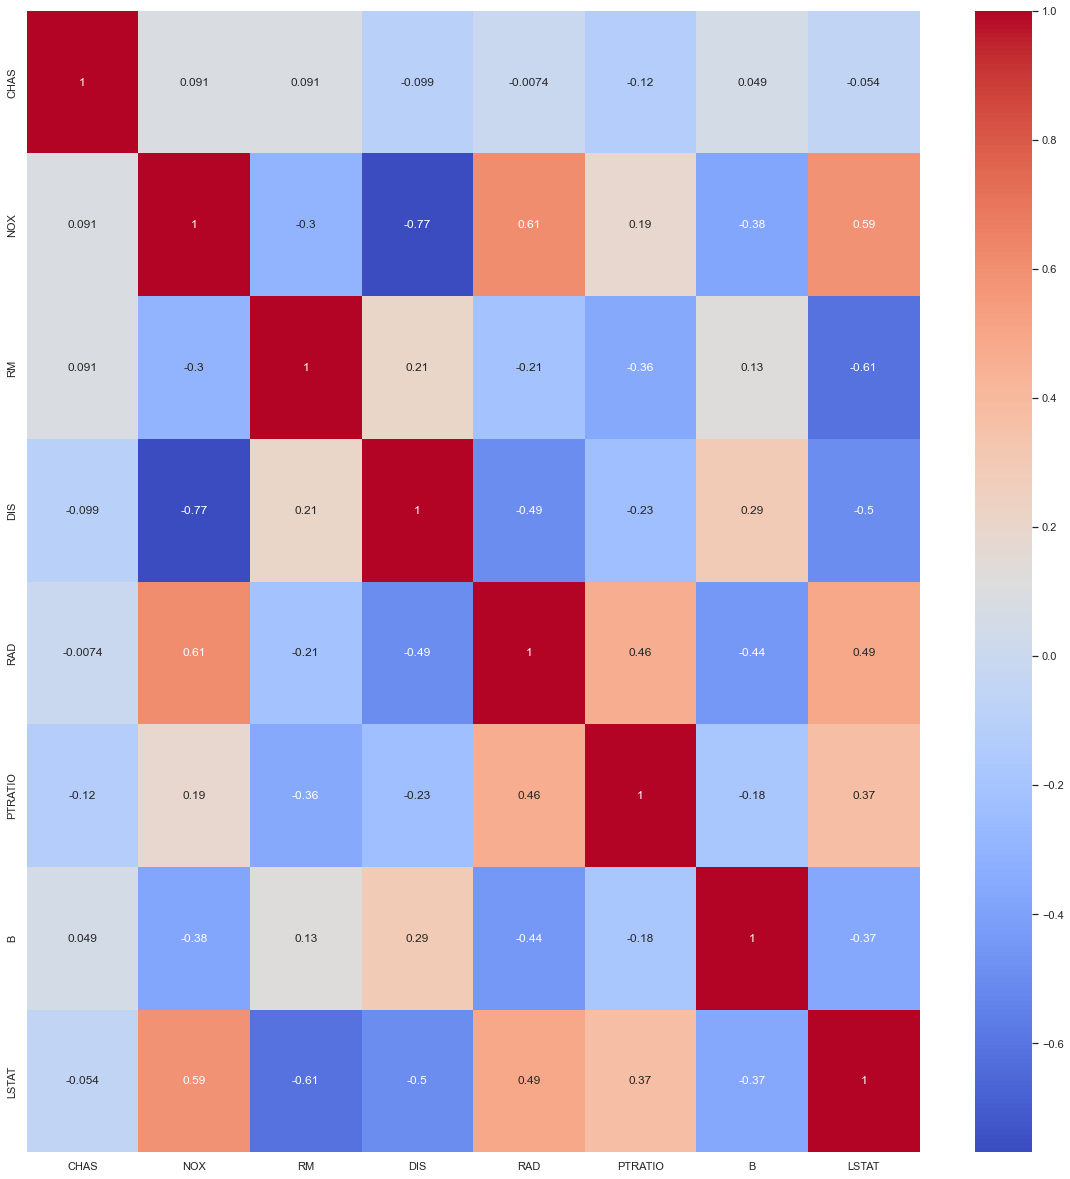

In [8]:
plt.figure(figsize=(20,21))
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')

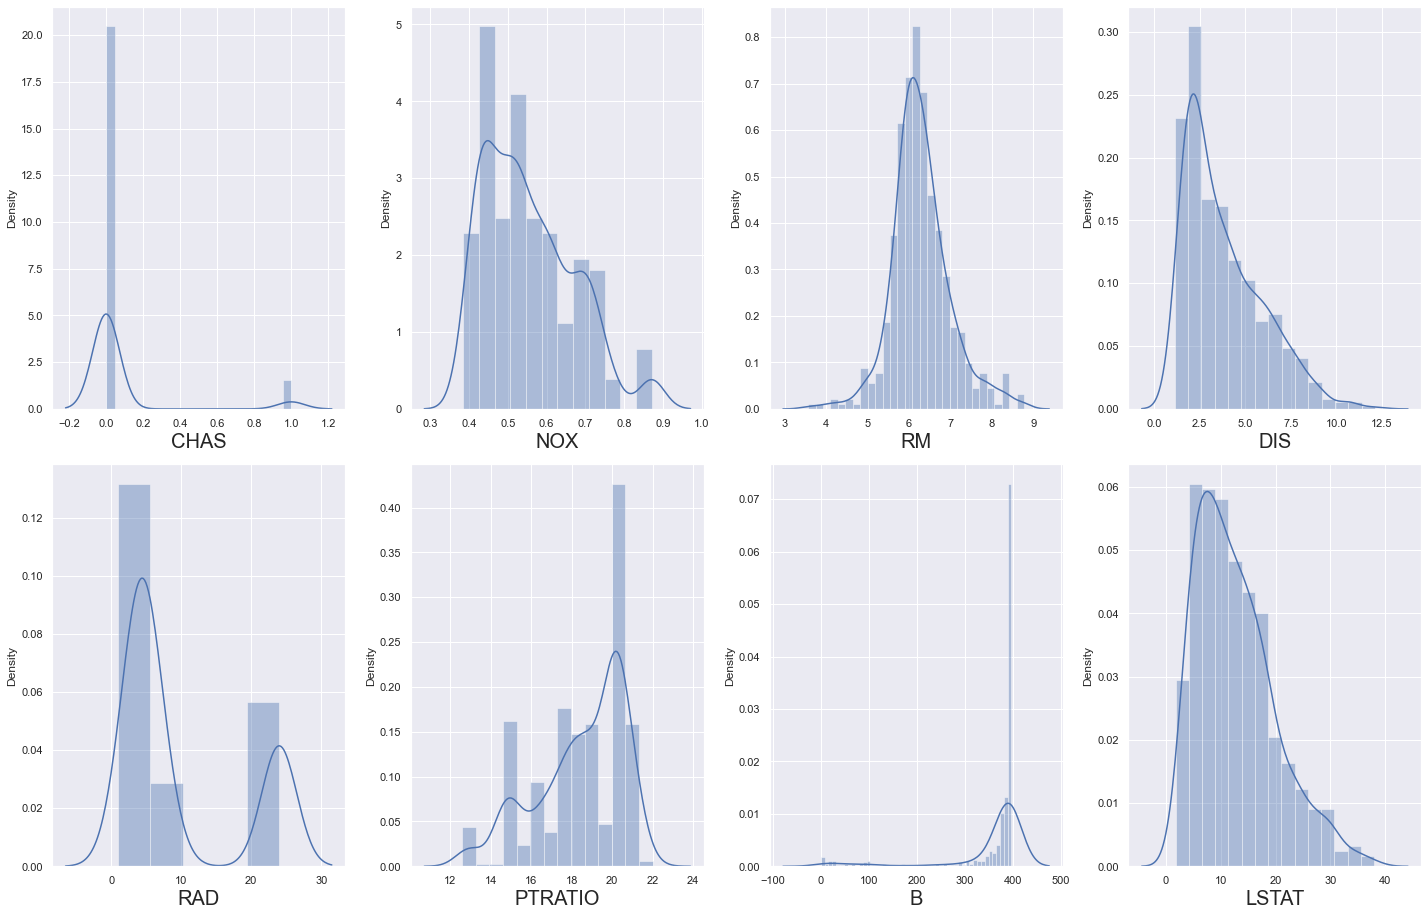

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [10]:
Y=bos['Price']
X=bos.drop(columns=['Price','TAX','INDUS','AGE','ZN','CRIM'])

In [12]:
X.loc[360:370]

,CHAS,NOX,RM,DIS,RAD,PTRATIO,B,LSTAT
360,0.0,0.770,6.398,2.5182,24.0,20.2,374.56,7.79
361,0.0,0.770,6.251,2.2955,24.0,20.2,350.65,14.19
362,0.0,0.770,5.362,2.1036,24.0,20.2,380.79,10.19
363,1.0,0.770,5.803,1.9047,24.0,20.2,353.04,14.64
364,1.0,0.718,8.780,1.9047,24.0,20.2,354.55,5.29
365,0.0,0.718,3.561,1.6132,24.0,20.2,354.70,7.12
366,0.0,0.718,4.963,1.7523,24.0,20.2,316.03,14.00
367,0.0,0.631,3.863,1.5106,24.0,20.2,131.42,13.33
368,0.0,0.631,4.970,1.3325,24.0,20.2,375.52,3.26
369,1.0,0.631,6.683,1.3567,24.0,20.2,375.33,3.73


In [13]:
X.B[[155,156,367]]=X.B.mean()

In [14]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.27259857, -0.14421743,  0.41367189, ..., -1.45900038,
         0.43478044, -1.0755623 ],
       [-0.27259857, -0.74026221,  0.19427445, ..., -0.30309415,
         0.43478044, -0.49243937],
       [-0.27259857, -0.74026221,  1.28271368, ..., -0.30309415,
         0.38907922, -1.2087274 ],
       ...,
       [-0.27259857,  0.15812412,  0.98496002, ...,  1.17646583,
         0.43478044, -0.98304761],
       [-0.27259857,  0.15812412,  0.72567214, ...,  1.17646583,
         0.39604108, -0.86530163],
       [-0.27259857,  0.15812412, -0.36276709, ...,  1.17646583,
         0.43478044, -0.66905833]])

In [15]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [16]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled.values
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [17]:
vif

,VIF,Features
0,1.051607,CHAS
1,3.506562,NOX
2,1.794417,RM
3,2.563712,DIS
4,2.236459,RAD
5,1.530328,PTRATIO
6,1.339317,B
7,2.544377,LSTAT


In [18]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=42)

In [19]:
model=sm.OLS(y_train,sm.add_constant(x_train)).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 01 Sep 2022   Prob (F-statistic):          1.92e-102
Time:                        16:31:31   Log-Likelihood:                -1134.5
No. Observations:                 379   AIC:                             2287.
Df Residuals:                     370   BIC:                             2322.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4454      0.253     88.893      0.000      21.949      22.942
CHAS           0.7837      0.249      3.153      0.002       0.295       1.272
NOX           -2.1238      0.464     -4.582      0.000      -3.035      -1.212
RM             3.2362      0.329      9.827      0.000       2.589       3.884
DIS           -2.3903      0.403     -5.928      0.000      -3.183      -1.597
RAD            0.5471      0.374      1.464      0.144      -0.188       1.282
PTRATIO       -2.1455      0.302     -7.115      0.000      -2.738      -1.552
B              1.3210      0.298      4.426      0.000       0.734       1.908
LSTAT         -3.8005      0.398     -9.553      0.000      -4.583      -3.018
==============================================================================
Omnibus:                      115.864   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.837
Skew:                           1.264   Prob(JB):                    1.30e-108
Kurtosis:                       8.007   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_sk=LinearRegression()

In [22]:
model_sk.fit(x_train,y_train)

LinearRegression()

In [23]:
model_sk.score(x_train,y_train)

0.7371643193118889

In [24]:
model_sk.score(x_test,y_test)

0.6651400943220356

In [25]:
influence=model.get_influence()
(c, p)=influence.cooks_distance

<StemContainer object of 3 artists>

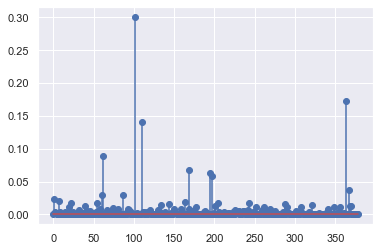

In [26]:
plt.stem(np.arange(len(x_train)),np.round(c,3))

In [27]:
from statsmodels.graphics.regressionplots import influence_plot

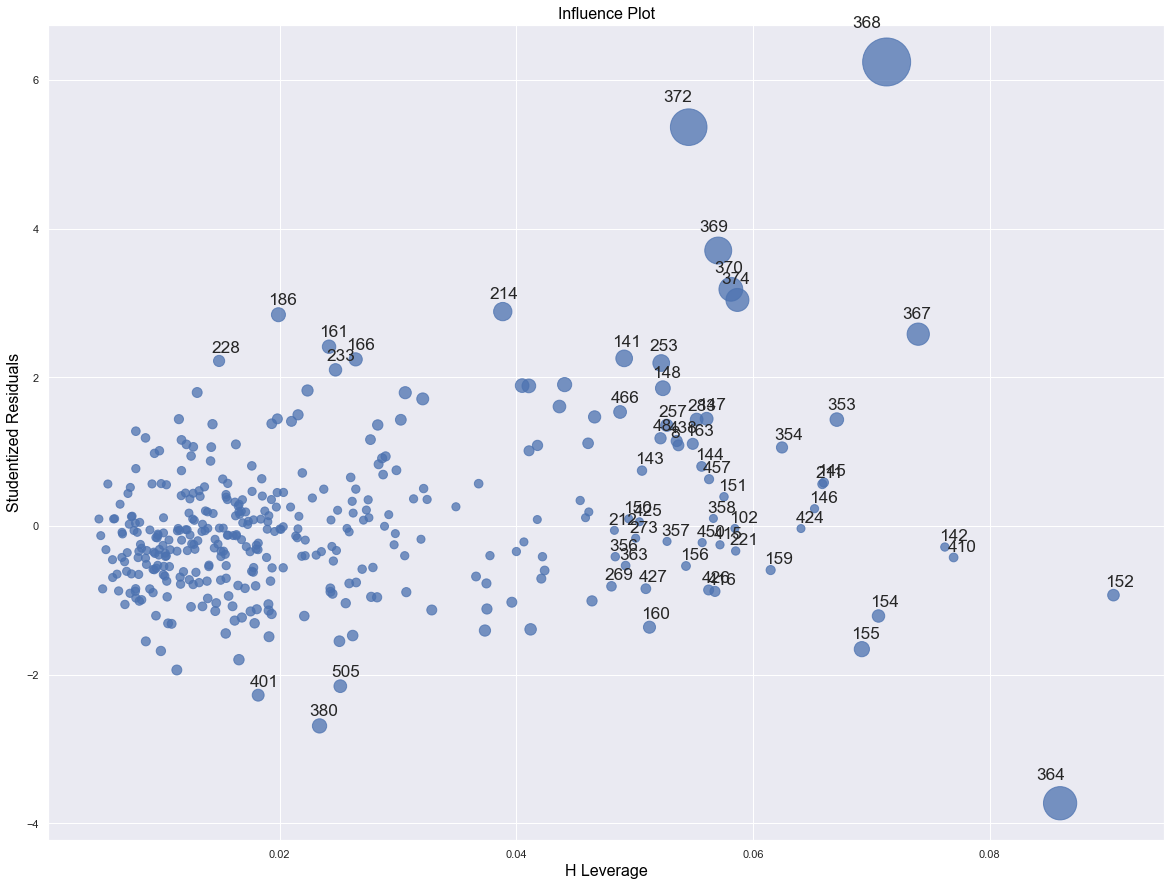

In [28]:
fig, ax=plt.subplots(figsize=(20,15))
plt.plot(0.08,6,'b-')
influence_plot(model, ax=ax, line=(0.08,6))
plt.show();

In [29]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train) 

DecisionTreeRegressor()

In [30]:
model_dt.score(x_train,y_train)

1.0

In [31]:
model_dt.score(x_test,y_test)

0.6580369887481519

In [33]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5,6,7],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50] }
grid_search = GridSearchCV(estimator=model_dt, param_grid=parameters, cv=3)


In [34]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6],
                         'splitter': ['best', 'random']})

In [35]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 6,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [36]:
model_dt_tuned = DecisionTreeRegressor(max_depth=5, max_features='sqrt',
                                       max_leaf_nodes=50, min_samples_leaf=6,
                                       min_weight_fraction_leaf=0.1, splitter='best' )
model_dt_tuned.fit(x_train,y_train) 

DecisionTreeRegressor(max_depth=5, max_features='sqrt', max_leaf_nodes=50,
                      min_samples_leaf=6, min_weight_fraction_leaf=0.1)

In [37]:
model_dt_tuned.score(x_train,y_train)

0.7261706537192014

In [38]:
model_dt_tuned.score(x_test,y_test)

0.5759873382719335

In [40]:
b_model = BaggingRegressor(base_estimator=model_dt_tuned)
b_model.fit(x_train,y_train) 

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                      max_features='sqrt',
                                                      max_leaf_nodes=50,
                                                      min_samples_leaf=6,
                                                      min_weight_fraction_leaf=0.1))

In [41]:
b_model.score(x_train,y_train)

0.650840692901075

In [42]:
b_model.score(x_test,y_test)

0.6156686916449561

In [43]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=123)
cvscore = cross_val_score(estimator=b_model, X=x_train, y=y_train, cv=k_fold)

In [44]:
cvscore

array([0.74507721, 0.73054336, 0.66369888, 0.69743047, 0.50404125,
       0.80801425, 0.30888501, 0.64252396, 0.7544668 , 0.83514318])

In [45]:
cvscore.mean(),cvscore.std()

(0.6689824364755108, 0.14907715438529576)